In [3]:
print("Hello world")

Hello world


In [4]:
# Shift + Enter

In [5]:
print("Hello")
print("world")

Hello
world


In [6]:
fullname = "Ilya Zakharov"

In [7]:
print(f"My name is {fullname}")

My name is Ilya Zakharov


In [8]:
import pandas

In [17]:
trips = pandas.read_excel("trips_data.xlsx")

In [18]:
trips.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [19]:
trips.describe()

,salary,age,family_members
count,1000.000000,1000.000000,1000.000000
mean,111935.000000,55.209000,1.295000
std,54580.049073,11.925164,0.885867
min,0.000000,18.000000,0.000000
25%,68000.000000,50.000000,1.000000
50%,99000.000000,58.000000,1.000000
75%,161000.000000,63.000000,2.000000
max,250000.000000,82.000000,4.000000


In [20]:
trips.salary

0      196000
1      152000
2       83000
3      161000
4      146000
        ...  
995     81000
996     96000
997     56000
998    162000
999    171000
Name: salary, Length: 1000, dtype: int64

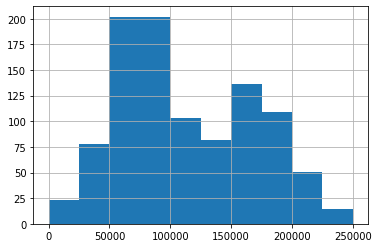

In [22]:
trips.salary.hist()

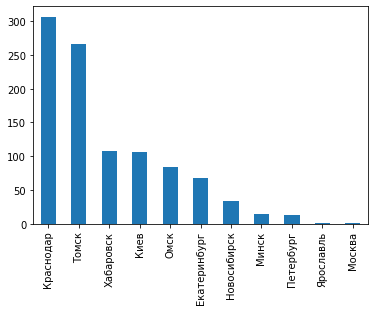

In [24]:
trips.city.value_counts().plot(kind='bar')

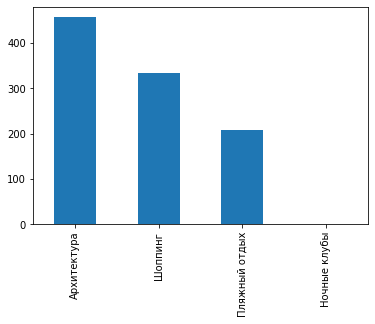

In [25]:
trips.vacation_preference.value_counts().plot(kind='bar')

In [26]:
trips_updated = pandas.get_dummies(trips, columns=['city','vacation_preference','transport_preference'])

In [27]:
trips_updated.head()

,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,Sydney,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [29]:
input_data = trips_updated.drop("target", axis = 1) #все данные, на основе которых делаем предсказание
target = trips_updated.target #Что предсказываем

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = RandomForestClassifier()

model.fit(input_data, target)

In [33]:
model.fit(input_data, target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
model.feature_importances_ #Показывает значимость колонок

array([2.29227087e-01, 1.96659889e-01, 1.58285139e-01, 1.69051174e-02,
       1.40216411e-02, 2.07054900e-02, 3.70398294e-03, 1.29609308e-04,
       6.72638834e-03, 1.38578179e-02, 1.59155539e-03, 1.91087035e-02,
       1.23404656e-02, 3.63736120e-04, 3.18584685e-02, 2.17467881e-04,
       3.16774557e-02, 7.50146664e-02, 4.46463056e-02, 1.15429422e-04,
       2.45202635e-02, 3.39664650e-02, 6.43568547e-02])

In [35]:
{col:0 for col in input_data.columns}

{'salary': 0,
 'age': 0,
 'family_members': 0,
 'city_Екатеринбург': 0,
 'city_Киев': 0,
 'city_Краснодар': 0,
 'city_Минск': 0,
 'city_Москва': 0,
 'city_Новосибирск': 0,
 'city_Омск': 0,
 'city_Петербург': 0,
 'city_Томск': 0,
 'city_Хабаровск': 0,
 'city_Ярославль': 0,
 'vacation_preference_Архитектура': 0,
 'vacation_preference_Ночные клубы': 0,
 'vacation_preference_Пляжный отдых': 0,
 'vacation_preference_Шоппинг': 0,
 'transport_preference_Автомобиль': 0,
 'transport_preference_Космический корабль': 0,
 'transport_preference_Морской транспорт': 0,
 'transport_preference_Поезд': 0,
 'transport_preference_Самолет': 0}

In [36]:
myExample = {'salary': 100000,
 'age': 40,
 'family_members': 3,
 'city_Екатеринбург': 0,
 'city_Киев': 0,
 'city_Краснодар': 0,
 'city_Минск': 0,
 'city_Москва': 0,
 'city_Новосибирск': 1,
 'city_Омск': 0,
 'city_Петербург': 0,
 'city_Томск': 0,
 'city_Хабаровск': 0,
 'city_Ярославль': 0,
 'vacation_preference_Архитектура': 1,
 'vacation_preference_Ночные клубы': 0,
 'vacation_preference_Пляжный отдых': 0,
 'vacation_preference_Шоппинг': 0,
 'transport_preference_Автомобиль': 0,
 'transport_preference_Космический корабль': 0,
 'transport_preference_Морской транспорт': 0,
 'transport_preference_Поезд': 0,
 'transport_preference_Самолет': 1}

In [39]:
df = pandas.DataFrame(data = [myExample])

In [40]:
df.head()

,salary,age,family_members,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,100000,40,3,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [41]:
model.predict(df)

array(['Paris'], dtype=object)